###**Problem Statement**
*The Bank Indessa has not done well in the last 3 quarters. Their NPAs (Non Performing Assets) have reached all time high. It is starting to lose the confidence of its investors. As a result, it’s stock has fallen by 20% in the previous quarter alone.* 
<br>

After careful analysis, it was found that the majority of NPA was contributed by loan defaulters. 
With the messy data collected over all the years, this bank has decided to use machine learning to figure out a way to find these defaulters and devise a plan to reduce them.  
<br>

This bank uses a pool of investors to sanction their loans. <br>
***For example:*** If any customer has applied for a loan of $20000, along with the bank, the investors perform due diligence on the requested loan application. Keep this in mind while understanding data.  
In this challenge, you will help this bank by predicting the probability that a member will default. *italicized text*

**Importing the Necessary Dependencies**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Data Collection and Preprocessing**<br>
Read the Loan data CSV and pull the file info.

In [ ]:
train_path = "/content/drive/MyDrive/Artivatic/ML_Artivatic_dataset/train_indessa.csv"
test_path = "/content/drive/MyDrive/Artivatic/ML_Artivatic_dataset/test_indessa.csv"

In [ ]:
train_set = pd.read_csv(train_path)
test_set = pd.read_csv(test_path)

In [ ]:
train_set.shape, test_set.shape

((532428, 45), (354951, 44))

In [ ]:
train_set.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,9 years,OWN,28700.0,Source Verified,n,NaN,debt_consolidation,Debt consolidation,349xx,FL,33.88,0.0,1.0,50.0,75.0,14.0,1.0,22515.0,73.1,28.0,f,1173.84,0.0,0.0,0.0,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,65000.0,Source Verified,n,NaN,home_improvement,Home improvement,209xx,MD,3.64,0.0,1.0,NaN,NaN,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,2 years,OWN,45000.0,Not Verified,n,NaN,debt_consolidation,Debt consolidation,447xx,OH,18.42,0.0,0.0,NaN,NaN,5.0,0.0,10877.0,31.2,19.0,w,56.47,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,10+ years,RENT,105000.0,Not Verified,n,> My goal is to obtain a loan to pay off my hi...,debt_consolidation,Debt consolidation,221xx,VA,14.97,0.0,2.0,46.0,NaN,10.0,0.0,13712.0,55.5,21.0,f,4858.62,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,52000.0,Verified,n,NaN,credit_card,refi,900xx,CA,20.16,0.0,0.0,NaN,NaN,11.0,0.0,35835.0,76.2,27.0,w,2296.41,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


In [ ]:
test_set.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,11937648,14000,14000,14000.0,60 months,BAT4711174,16.24,C,C5,Data Analyst,4 years,RENT,73500.0,Source Verified,n,NaN,credit_card,wrap it up,450xx,OH,28.65,1.0,1.0,20.0,NaN,16.0,0.0,29828,65.3,53.0,f,3915.61,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,104th week,0.0,0.0,85230.0,45700.0
1,38983318,16000,16000,16000.0,60 months,BAT4318899,9.49,B,B2,Senior Database Administrator,5 years,MORTGAGE,105000.0,Source Verified,n,NaN,major_purchase,Major purchase,275xx,NC,31.19,0.0,0.0,NaN,NaN,8.0,0.0,4161,19.4,63.0,w,1495.06,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,57th week,0.0,0.0,444991.0,21400.0
2,27999917,11050,11050,11050.0,60 months,BAT446479,15.61,D,D1,Customer service representative,10+ years,RENT,62300.0,Not Verified,n,NaN,debt_consolidation,Debt consolidation,672xx,KS,21.73,1.0,0.0,23.0,115.0,11.0,1.0,12064,74.0,20.0,w,2096.21,0.0,0.0,0.0,0.0,26.0,INDIVIDUAL,NaN,70th week,0.0,0.0,105737.0,16300.0
3,61514932,35000,35000,34700.0,60 months,BAT4664105,12.69,C,C2,ACCT OFFICER,10+ years,OWN,150000.0,Source Verified,n,NaN,debt_consolidation,Debt consolidation,961xx,CA,17.27,0.0,0.0,NaN,NaN,21.0,0.0,32549,45.0,26.0,f,1756.31,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,22th week,0.0,0.0,287022.0,72400.0
4,59622821,6500,6500,6500.0,36 months,,6.89,A,A3,Paralegal,5 years,MORTGAGE,52000.0,Not Verified,n,NaN,major_purchase,Major purchase,707xx,LA,20.19,0.0,0.0,NaN,NaN,16.0,0.0,5133,19.2,36.0,w,172.21,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,22th week,0.0,0.0,234278.0,26700.0


# Function to calculate missing values by column

In [ ]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
          # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
missing_values_table(train_set)

Your selected dataframe has 45 columns.
There are 21 columns that have missing values.


,Missing Values,% of Total Values
verification_status_joint,532123,99.9
desc,456829,85.8
mths_since_last_record,450305,84.6
mths_since_last_major_derog,399448,75.0
mths_since_last_delinq,272554,51.2
batch_enrolled,85149,16.0
tot_cur_bal,42004,7.9
tot_coll_amt,42004,7.9
total_rev_hi_lim,42004,7.9
emp_title,30833,5.8


In [ ]:
#pd.isnull(train_set)
pd.DataFrame.isnull(train_set).sum()

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  85149
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       30833
emp_length                      26891
home_ownership                      0
annual_inc                          3
verification_status                 0
pymnt_plan                          0
desc                           456829
purpose                             0
title                              90
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        16
inq_last_6mths                     16
mths_since_last_delinq         272554
mths_since_last_record         450305
open_acc                           16
pub_rec     

**Plotting heapmap to get correlation and avoid Multicollinearity**

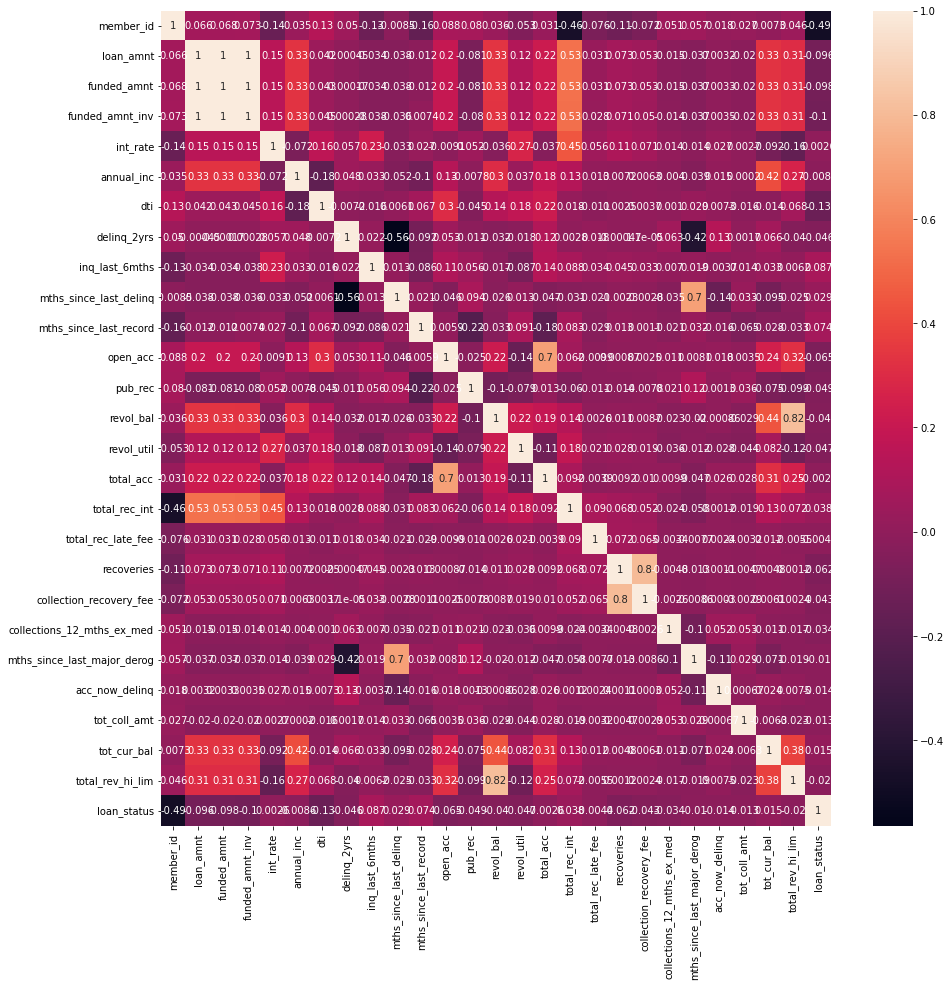

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(train_set.corr(), annot = True)
plt.show()

In [ ]:
col_name = ["funded_amnt","funded_amnt_inv","batch_enrolled","emp_title", "emp_length", "desc", "title", "mths_since_last_delinq",
           "mths_since_last_record", "mths_since_last_major_derog", "verification_status_joint" , "total_rev_hi_lim","last_week_pay",
            "zip_code","addr_state","sub_grade","initial_list_status",'collection_recovery_fee', 'open_acc']

In [ ]:
train_dataset = train_set.drop(col_name, axis =1)
test_dataset = test_set.drop(col_name, axis =1)
train_dataset.shape, test_dataset.shape

((532428, 26), (354951, 25))

In [ ]:
train_dataset['term'] = train_dataset['term'].map(lambda x: x.lstrip('+-').rstrip('months'))
test_dataset['term'] = test_dataset['term'].map(lambda x: x.lstrip('+-').rstrip('months'))

Filling missing value Using linear Interpolation Method

In [ ]:
interpolate_value = 'pub_rec','total_acc','revol_util','collections_12_mths_ex_med','annual_inc','delinq_2yrs','inq_last_6mths','acc_now_delinq',"tot_coll_amt", "tot_cur_bal"


In [ ]:
for x in interpolate_value:
  train_dataset[x].interpolate(method ="linear", inplace= True, limit_direction='forward')
  test_dataset[x].interpolate(method ="linear", inplace= True, limit_direction='forward')

In [ ]:
# drop_corr_col = ['collection_recovery_fee', 'open_acc']
# train_dataset = train_dataset.drop(drop_corr_col, axis= 1)
# test_dataset = test_dataset.drop(drop_corr_col, axis=1)

In [ ]:
X = train_dataset.drop('loan_status', axis = 1)
y = train_dataset['loan_status']
X.shape

(532428, 25)

In [ ]:
X.head()

,loan_amnt,term,int_rate,grade,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal
0,14350,36,19.19,E,OWN,28700.0,Source Verified,n,debt_consolidation,33.88,0.0,1.0,1.0,22515.0,73.1,28.0,1173.84,0.0,0.0,0.0,INDIVIDUAL,0.0,0.0,28699.0
1,4800,36,10.99,B,MORTGAGE,65000.0,Source Verified,n,home_improvement,3.64,0.0,1.0,0.0,7624.0,23.2,13.0,83.95,0.0,0.0,0.0,INDIVIDUAL,0.0,0.0,9974.0
2,10000,36,7.26,A,OWN,45000.0,Not Verified,n,debt_consolidation,18.42,0.0,0.0,0.0,10877.0,31.2,19.0,56.47,0.0,0.0,0.0,INDIVIDUAL,0.0,65.0,38295.0
3,15000,36,19.72,D,RENT,105000.0,Not Verified,n,debt_consolidation,14.97,0.0,2.0,0.0,13712.0,55.5,21.0,4858.62,0.0,0.0,0.0,INDIVIDUAL,0.0,0.0,55564.0
4,16000,36,10.64,B,RENT,52000.0,Verified,n,credit_card,20.16,0.0,0.0,0.0,35835.0,76.2,27.0,2296.41,0.0,0.0,0.0,INDIVIDUAL,0.0,0.0,47159.0


### **Exploratory Data Analysis**

Text(0.5, 1.0, 'Frequency of loan applied based on their Annual Income')

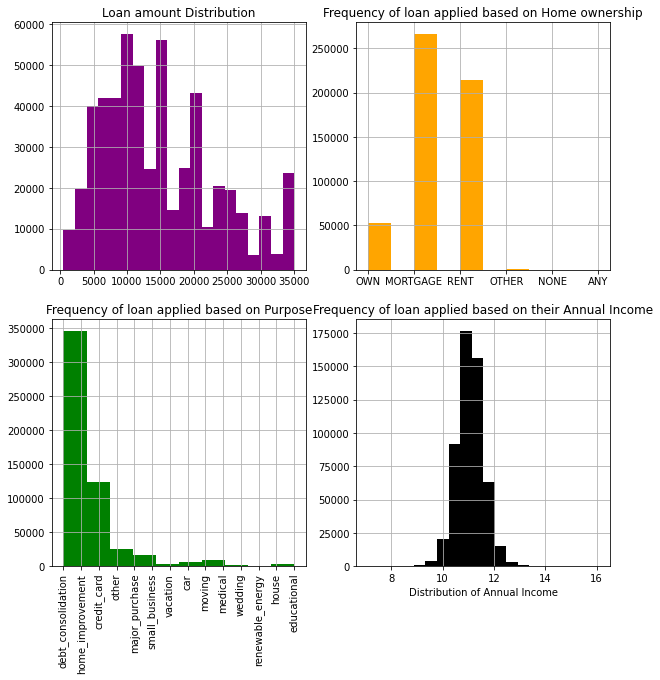

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
(X['loan_amnt']).hist(bins=20, color='purple')
plt.title(label="Loan amount Distribution")

plt.subplot(2,2,2)
X['home_ownership'].hist(color='orange')
plt.title(label="Frequency of loan applied based on Home ownership")

plt.subplot(2,2,3)
X['purpose'].hist(bins=10,color='green')
plt.xticks(rotation='vertical')
plt.title(label="Frequency of loan applied based on Purpose")

plt.subplot(2,2,4)
np.log(X['annual_inc']).hist(bins=20,color='black')
plt.xlabel("Distribution of Annual Income")
plt.title(label="Frequency of loan applied based on their Annual Income")
#plt.hist(bins=200)

Text(0.5, 1.0, 'loan_status with respect to their grade')

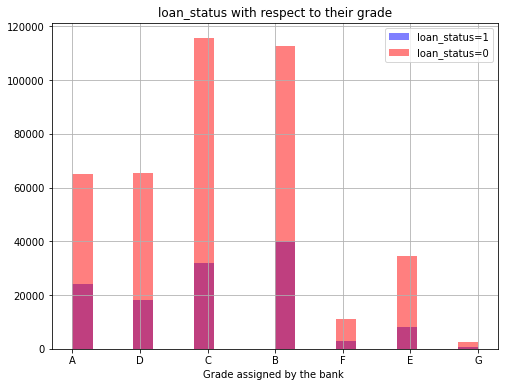

In [ ]:
plt.figure(figsize=(8,6))
train_dataset[train_dataset['loan_status']==1]['grade'].hist(alpha=0.5,color='blue',bins=20,label='loan_status=1')
train_dataset[train_dataset['loan_status']==0]['grade'].hist(alpha=0.5,color='red',bins=20,label='loan_status=0')
plt.legend()
plt.xlabel('Grade assigned by the bank ')
plt.title(label="loan_status with respect to their grade")

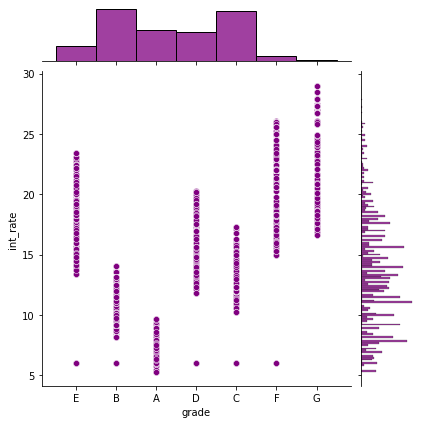

In [ ]:
sns.jointplot(x='grade',y='int_rate',data=X,color='purple')

In [ ]:
# annual_inc= np.log(X['annual_inc'])
# revol_bal =np.log(X['revol_bal'])
# df = [annual_inc, revol_bal]
# dataplot = pd.concat(df,  axis=1, join='inner')
# dataplot.columns = ['annual_inc', 'revol_bal']

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 864x504 with 0 Axes>

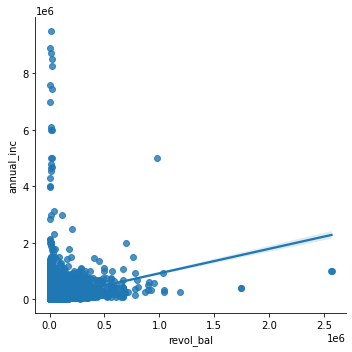

In [ ]:
plt.figure(figsize=(12,7))
#dataplot['annual_inc'].hist(bins=10)
sns.lmplot(y='annual_inc',x='revol_bal', data= X)


**Check the label "*loan_status*" distribution in the dataset**


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


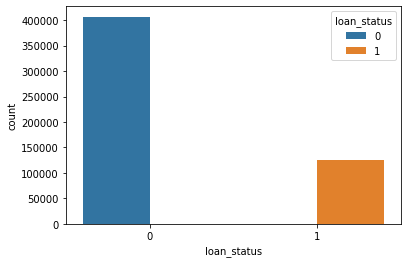

In [ ]:
#plt.bar(train_data_dumm['loan_status'],height=1, width=0.8)
sns.countplot(train_dataset['loan_status'], hue=train_dataset['loan_status'])
plt.show()

**Percentage of Defaulter & Non_Defaulter Labels**

In [ ]:
 Defaulter = train_dataset[train_dataset['loan_status']==1]
 Non_Defaulter = train_dataset[train_dataset['loan_status']==0]

print("No of loan Defaulter:", Defaulter.shape[0])
print("% of loan Defaulter", Defaulter.shape[0]/train_dataset.shape[0]*100)
print("No of loan Non_Defaulter:", Non_Defaulter.shape[0])
print("% of loan Non_Defaulter", Non_Defaulter.shape[0]/train_dataset.shape[0]*100)

No of loan Defaulter: 125827
% of loan Defaulter 23.632678972555915
No of loan Non_Defaulter: 406601
% of loan Non_Defaulter 76.36732102744409


**The above shows, This dataset is imbalanced **

In [ ]:
#Changing to int type
X['term'] = X['term'].astype(int)

**Resample the training set "Under-sampling"**

In [ ]:
# from imblearn.under_sampling import NearMiss
# N_mis = NearMiss(random_state=42)
# X_resamp, y_resamp = N_mis.fit_resample(X,y)

In [ ]:
# #pd.DataFrame(y_resamp).hist(color='red')
# pdf = pd.DataFrame(y_resamp)
# pdf.columns = ["loan_status"]
# sns.countplot(pdf["loan_status"], hue=pdf["loan_status"])
# plt.show()

##Performing train test split using sklearn train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =0)

In [ ]:
#List of col name for Label Encoding
encode_col = ['home_ownership','verification_status','pymnt_plan','purpose','application_type', 'grade']

In [ ]:
from sklearn.preprocessing import LabelEncoder

for i in encode_col:
  X_train[i]= LabelEncoder().fit_transform(X_train[i])
  X_test[i]= LabelEncoder().fit_transform(X_test[i])

  test_dataset[i]= LabelEncoder().fit_transform(test_dataset[i])

##Checking the value counts

In [ ]:
pd.DataFrame(y_train).value_counts(), pd.DataFrame(y_test).value_counts()

(loan_status
 0              284638
 1               88061
 dtype: int64, loan_status
 0              121963
 1               37766
 dtype: int64)

In [ ]:
pd.DataFrame(X_train).head()

,loan_amnt,term,int_rate,grade,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal
346208,20000,36,8.19,0,1,263000.0,1,0,4,8.63,2.0,1.0,0.0,3748.0,40.7,26.0,1254.04,0.0,0.0,0.0,0,0.0,0.0,377556.0
217875,12000,60,14.33,2,5,42500.0,2,0,2,31.01,0.0,1.0,0.0,13742.0,68.7,20.0,275.40,0.0,0.0,0.0,0,0.0,0.0,39325.0
418539,27000,36,20.99,4,4,75000.0,1,0,9,31.57,1.0,0.0,1.0,11652.0,61.0,13.0,3036.89,0.0,0.0,0.0,0,0.0,0.0,53759.0
416812,8000,36,12.69,2,1,65000.0,0,0,2,10.53,0.0,0.0,1.0,7131.0,78.4,15.0,515.98,0.0,0.0,0.0,0,0.0,0.0,208717.0
11593,27000,36,15.31,2,1,68000.0,1,0,1,14.35,0.0,0.0,0.0,13800.0,58.0,28.0,6842.37,0.0,0.0,0.0,0,0.0,196.5,205206.5


In [ ]:
pd.DataFrame(X_train).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372699 entries, 346208 to 305711
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   372699 non-null  int64  
 1   term                        372699 non-null  int64  
 2   int_rate                    372699 non-null  float64
 3   grade                       372699 non-null  int64  
 4   home_ownership              372699 non-null  int64  
 5   annual_inc                  372699 non-null  float64
 6   verification_status         372699 non-null  int64  
 7   pymnt_plan                  372699 non-null  int64  
 8   purpose                     372699 non-null  int64  
 9   dti                         372699 non-null  float64
 10  delinq_2yrs                 372699 non-null  float64
 11  inq_last_6mths              372699 non-null  float64
 12  pub_rec                     372699 non-null  float64
 13  revol_bal

In [ ]:
pd.DataFrame(X_train).describe()

,member_id,loan_amnt,int_rate,grade,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal
count,3.726990e+05,372699.000000,372699.000000,372699.000000,372699.000000,3.726990e+05,372699.000000,372699.000000,372699.000000,372699.000000,372699.000000,372699.000000,372699.000000,3.726990e+05,372699.000000,372699.000000,372699.000000,372699.000000,372699.000000,372699.000000,372699.000000,372699.000000,372699.000000,3.726990e+05
mean,3.500186e+07,14769.329539,13.238214,1.795562,2.903029,7.510769e+04,1.026979,0.000019,2.567600,18.135774,0.315326,0.693623,0.194404,1.692972e+04,55.028661,25.270168,1754.459472,0.400886,46.083938,0.014608,0.000555,0.005095,211.446789,1.395646e+05
std,2.411383e+07,8430.809388,4.381665,1.313071,1.921351,6.626327e+04,0.792172,0.004334,2.274593,8.376248,0.861386,0.995387,0.584284,2.266149e+04,23.873937,11.858581,2092.971513,4.122292,412.973333,0.135810,0.023561,0.081166,1863.847867,1.512864e+05
min,7.047300e+04,500.000000,5.320000,0.000000,0.000000,1.200000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.087681e+07,8000.000000,9.990000,1.000000,1.000000,4.500000e+04,0.000000,0.000000,2.000000,11.920000,0.000000,0.000000,0.000000,6.444500e+03,37.600000,17.000000,442.175000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.099000e+04
50%,3.708532e+07,13000.000000,12.990000,2.000000,4.000000,6.500000e+04,1.000000,0.000000,2.000000,17.650000,0.000000,0.000000,0.000000,1.188100e+04,55.900000,24.000000,1074.470000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.527900e+04
75%,5.845984e+07,20000.000000,16.200000,3.000000,5.000000,9.000000e+04,2.000000,0.000000,2.000000,23.950000,0.000000,1.000000,0.000000,2.085400e+04,73.500000,32.000000,2234.355000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.068738e+05
max,7.354283e+07,35000.000000,28.990000,6.000000,5.000000,9.500000e+06,2.000000,1.000000,13.000000,672.520000,30.000000,31.000000,86.000000,2.568995e+06,892.300000,162.000000,23172.310000,358.680000,33520.270000,16.000000,1.000000,14.000000,496651.000000,8.000078e+06


In [ ]:
X_train.shape,  X_test.shape

((372699, 25), (159729, 25))

**Standardization scales each input variable using Sklearn StandardScaler**

In [ ]:
from sklearn.preprocessing import StandardScaler
train_data_en = StandardScaler().fit_transform(X_train)
test_data_en = StandardScaler().fit_transform(X_test)

submi_test_dataset= StandardScaler().fit_transform(test_dataset)

In [ ]:
train_data_en[5].shape, test_data_en[5].shape

((25,), (25,))

In [ ]:
pd.DataFrame(train_data_en).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,0.264651,0.620424,-0.654847,-1.152124,-1.367454,-0.990465,2.835546,-0.034057,-0.004334,0.629740,-1.134850,1.955774,0.307797,-0.332721,-0.581680,-0.600181,0.061545,-0.239096,-0.097248,-0.111591,-0.107564,-0.023574,-0.062776,-0.113447,1.573120
1,1.453880,-0.328478,1.527074,0.249172,0.155695,1.091406,-0.492094,1.228297,-0.004334,-0.249539,1.536994,-0.366068,0.307797,-0.332721,-0.140667,0.572648,-0.444419,-0.706680,-0.097248,-0.111591,-0.107564,-0.023574,-0.062776,-0.113447,-0.662583
2,0.777612,1.450713,-0.654847,1.769144,1.678844,0.570938,-0.001625,-0.034057,-0.004334,2.827938,1.603850,0.794853,-0.696838,1.378777,-0.232894,0.250120,-1.034709,0.612733,-0.097248,-0.111591,-0.107564,-0.023574,-0.062776,-0.113447,-0.567174
3,0.731541,-0.802929,-0.654847,-0.125116,0.155695,-0.990465,-0.152539,-1.296410,-0.004334,-0.249539,-0.908018,-0.366068,-0.696838,1.378777,-0.432396,0.978949,-0.866055,-0.591733,-0.097248,-0.111591,-0.107564,-0.023574,-0.062776,-0.113447,0.457096
4,-1.382272,1.450713,-0.654847,0.472831,0.155695,-0.990465,-0.107265,-0.034057,-0.004334,-0.689179,-0.451966,-0.366068,-0.696838,-0.332721,-0.138108,0.124460,0.230199,2.430954,-0.097248,-0.111591,-0.107564,-0.023574,-0.062776,-0.008019,0.433892


**Importing Necessary Dependencies for model**

In [ ]:
#Import libraries:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier
#from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV   #Perforing grid search
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, plot_roc_curve
from sklearn.metrics import classification_report

**Created helper function for cross Validation & accuracies**

In [ ]:
 #Function to cross Validation & accuracies
def cross_val(x_train, y_train, model):
    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 5)
    return accuracies.mean()

**Helper function for making Confusion matrix and classification_report**

In [ ]:
# Takes in a model, trains the model, and evaluates the model on the test set
def conf_matrix(y_test, y_pred_test):
    conf_matrix = confusion_matrix(y_test, y_pred_test)
    print(classification_report(y_test,y_pred_test))
    # Print the confusion matrix using Matplotlib
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
          ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()

    #Precision = conf_matrix[0][0]/(conf_matrix[0][0]+conf_matrix[1][0])*100
    #Recall = conf_matrix[1][1]/(conf_matrix[1][1]+conf_matrix[0][1])*100  
    #print("Precision Score: = %0.4f" % Precision)
    #print("Recall Score: = %0.4f" % Recall)
    # Return the performance metric
    # return model_cross

**Hepler function fro ploting ROC_AUC curve**

In [ ]:
def roc_auc_curve(model):
  y_pred_test = model.predict_proba(test_data_en)
  y_pred = y_pred_test[:,1]
  model_fpr, model_tpr, threshold = roc_curve(y_test, y_pred)
  model_auc = auc(model_fpr, model_tpr)

  plt.figure(figsize = (5,5))
  plot1 = plt.plot(model_fpr, model_tpr, marker ='.', label ="Model_Roc (auc= %0.3f)" % model_auc)
  plt.xlabel("False Positive rate")
  plt.ylabel("True positive rate")

  plt.legend()
  plt.show()

###**We will compare four different machine learning Cassification models:**

1 - Logistic Regression<br>
2 - Random Forest Classification<br>
3 - XGBoost<br>
4 - Neural Network Model using Tensorflow 2.0

*** Model Name: Logistic Regression***



In [ ]:
# # Logistic Regression
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(solver='liblinear',max_iter=100, C=0.001, random_state=42)
lm.fit(train_data_en, y_train)
y_pred_test_lm = lm.predict(test_data_en)
y_pred_lm = lm.predict_proba(test_data_en)


              precision    recall  f1-score   support

           0       0.89      0.92      0.90    121963
           1       0.71      0.62      0.66     37766

    accuracy                           0.85    159729
   macro avg       0.80      0.77      0.78    159729
weighted avg       0.85      0.85      0.85    159729



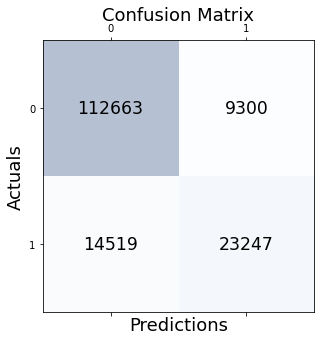

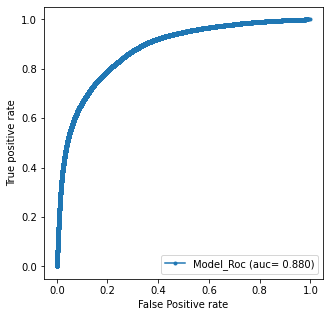

Logistic Regression Performance on the test set: Cross Validation Score = 0.8511


In [ ]:
lm_cross = cross_val(train_data_en, y_train, lm)
f=conf_matrix(y_test, y_pred_test_lm)
roc_auc_curve(lm)
print('Logistic Regression Performance on the test set: Cross Validation Score = %0.4f' % lm_cross)

**Model Name: Random Forest Classification**

In [ ]:
# # Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
random.fit(train_data_en, y_train)
y_pred_test_rf = random.predict(test_data_en)
y_pred_rf = random.predict_proba(test_data_en)


              precision    recall  f1-score   support

           0       0.89      0.97      0.93    121963
           1       0.86      0.63      0.73     37766

    accuracy                           0.89    159729
   macro avg       0.88      0.80      0.83    159729
weighted avg       0.89      0.89      0.88    159729



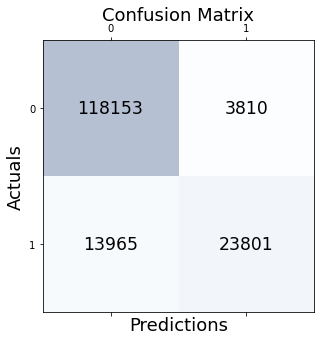

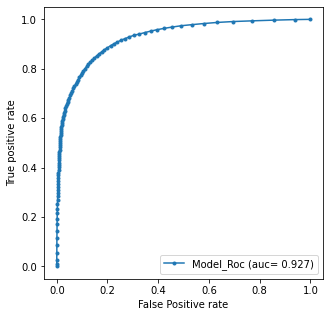

Random Fo  rest Performance on the  test set: Cross Validation Score = 0.8935


In [ ]:
random_cross = cross_val(train_data_en, y_train, random)
f=conf_matrix(y_test, y_pred_test_rf)
roc_auc_curve(random)
print('Random Forest Performance on the  test set: Cross Validation Score = %0.4f' % random_cross)

**Model Name:  Gradiente Boosting Classification**

In [ ]:
# # Gradiente Boosting Classification
from xgboost import XGBClassifier
gb =  XGBClassifier(learning_rate =0.1,
 n_estimators=200,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

gb.fit(train_data_en, y_train)
y_pred_test_gb = random.predict(test_data_en)
y_pred_gb = random.predict_proba(test_data_en)



              precision    recall  f1-score   support

           0       0.89      0.97      0.93    121963
           1       0.86      0.63      0.73     37766

    accuracy                           0.89    159729
   macro avg       0.88      0.80      0.83    159729
weighted avg       0.89      0.89      0.88    159729



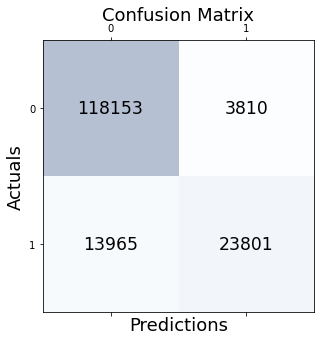

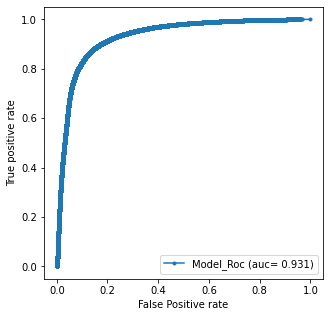

Gradiente Boosting Classification Performance on the test set: Cross Validation Score = 0.9050


In [ ]:
gb_cross = cross_val(train_data_en, y_train, gb)
f=conf_matrix(y_test, y_pred_test_gb)
roc_auc_curve(gb)
print('Gradiente Boosting Classification Performance on the test set: Cross Validation Score = %0.4f' % gb_cross)

**Model name: DecisionTreeClassifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTClassi = DecisionTreeClassifier(criterion='entropy', random_state=42)

DTClassi.fit(train_data_en, y_train)
y_pred_test_DTC = DTClassi.predict(test_data_en)
y_pred_DTC = DTClassi.predict_proba(test_data_en)

              precision    recall  f1-score   support

           0       0.92      0.89      0.90    121963
           1       0.67      0.74      0.70     37766

    accuracy                           0.85    159729
   macro avg       0.79      0.81      0.80    159729
weighted avg       0.86      0.85      0.85    159729



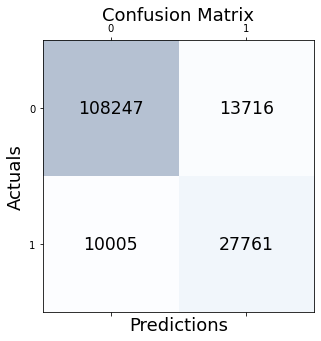

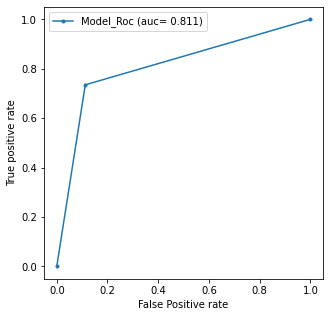

DecisionTree Classification Performance on the test set: Cross Validation Score = 0.8726


In [ ]:
DTC_cross = cross_val(train_data_en, y_train, DTClassi)
f=conf_matrix(y_test, y_pred_test_DTC)
roc_auc_curve(DTClassi)
print('DecisionTree Classification Performance on the test set: Cross Validation Score = %0.4f' % DTC_cross)

**Model Name : Deep learning with keras tensorflow**

*   List item
*   List item



In [ ]:
import tensorflow as tf 

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    #tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(50, activation='relu'),
     tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation ="sigmoid")])

#Compile the model

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(lr= 0.001),
              metrics=[tf.keras.metrics.AUC(from_logits=True)])

early_stop = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        mode='min', 
        verbose=1, 
        patience=25)
#Fit the model

history_1 = model_1.fit(train_data_en, y_train,
                        epochs=200, 
                        batch_size=500 , 
                       validation_data=(test_data_en, y_test),
                        callbacks=[early_stop])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/200
746/746 [==============================] - 4s 4ms/step - loss: 0.3666 - auc_2: 0.8693 - val_loss: 0.3004 - val_auc_2: 0.9152
Epoch 2/200
746/746 [==============================] - 3s 5ms/step - loss: 0.2958 - auc_2: 0.9162 - val_loss: 0.2605 - val_auc_2: 0.9360
Epoch 3/200
746/746 [==============================] - 3s 4ms/step - loss: 0.2638 - auc_2: 0.9325 - val_loss: 0.2412 - val_auc_2: 0.9440
Epoch 4/200
746/746 [==============================] - 3s 4ms/step - loss: 0.2494 - auc_2: 0.9392 - val_loss: 0.2338 - val_auc_2: 0.9479
Epoch 5/200
746/746 [==============================] - 3s 4ms/step - loss: 0.2420 - auc_2: 0.9425 - val_loss: 0.2271 - val_auc_2: 0.9510
Epoch 6/200
746/746 [==============================] - 3s 4ms/step - loss: 0.2366 - auc_2: 0.9448 - val_loss: 0.2244 - val_auc_2: 0.9516
Epoch 7/200
746/746 [==============================] - 3s 4ms/step - loss: 0.2329 - auc_2: 0.9465 - val_loss: 0.2199 - val_auc_2: 0.9537
Epoch 8/200
746/746 [====================

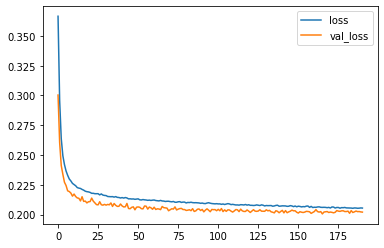

In [ ]:
pd.DataFrame(history_1.history)[['loss','val_loss']].plot()
#plot_loss_curve(history_1)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95    121963
           1       0.83      0.85      0.84     37766

    accuracy                           0.92    159729
   macro avg       0.89      0.90      0.90    159729
weighted avg       0.92      0.92      0.92    159729



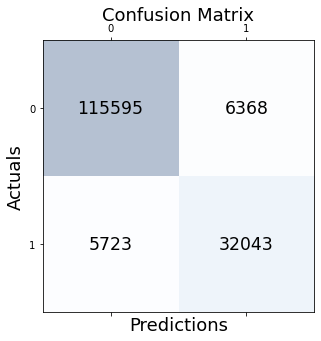

None 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95    121963
           1       0.83      0.85      0.84     37766

    accuracy                           0.92    159729
   macro avg       0.89      0.90      0.90    159729
weighted avg       0.92      0.92      0.92    159729



In [ ]:
from sklearn.metrics import classification_report
predictions = tf.round(model_1.predict(test_data_en))
final_sub_predictions = model_1.predict(submi_test_dataset)


print(
        conf_matrix(y_test,predictions), 
        '\n', 
        classification_report(y_test,predictions)
)

**Comparing Each ROC_AUC Curve**

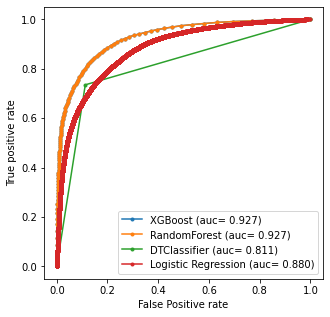

In [ ]:
DTC_prob = y_pred_DTC[:,1]
gb_prob = y_pred_gb[:,1]
rf_prob = y_pred_rf[:,1]
lm_prob= y_pred_lm[:,1]

gb_fpr, gb_tpr, threshold = roc_curve(y_test, gb_prob)
gb_auc = auc(gb_fpr, gb_tpr)

random_fpr, random_tpr, threshold = roc_curve(y_test, rf_prob)
random_auc = auc(random_fpr, random_tpr)

DTC_fpr, DTC_tpr, threshold = roc_curve(y_test, DTC_prob)
DTC_auc = auc(DTC_fpr, DTC_tpr)

lm_fpr, lm_tpr, threshold = roc_curve(y_test, lm_prob)
lm_auc = auc(lm_fpr, lm_tpr)

plt.figure(figsize = (5,5))

#plot_roc_curve(random, y_test, rf_prob )

plt.plot(gb_fpr, gb_tpr, marker ='.', label ="XGBoost (auc= %0.3f)" % gb_auc)
plt.plot(random_fpr, random_tpr, marker ='.', label ="RandomForest (auc= %0.3f)" % random_auc)
plt.plot(DTC_fpr, DTC_tpr, marker ='.', label ="DTClassifier (auc= %0.3f)" % DTC_auc)
plt.plot(lm_fpr, lm_tpr, marker ='.', label ="Logistic Regression (auc= %0.3f)" % lm_auc)

plt.xlabel("False Positive rate")
plt.ylabel("True positive rate")

plt.legend()
plt.show()


#**AUC Value of All Model used:**

**Deep learning with keras tensorflow_AUC   =0.96**<br>
**RandomForest_AUC        = 0.922**<br>
**XGBoost_AUC             = 0.905**<br>
**Logistic_Regression_AUC = 0.88**<br>
**DTClassifier            = 0.87**


#***Final model used for prediction is  "Deep learning with keras tensorflow"***

In [ ]:
member_id = pd.DataFrame(test_set['member_id'])
loan_status = pd.DataFrame(final_sub_predictions)
final_df = [member_id, loan_status]

In [ ]:
final_submission = pd.concat(final_df,  axis=1, join='inner')
final_submission.columns = ['member_id', 'loan_status']

In [ ]:
final_submission.to_csv (r'/content/drive/MyDrive/Artivatic/ML_Artivatic_dataset/final_submission.csv', index=False,header=True)

In [ ]:
path ="/content/drive/MyDrive/Artivatic/ML_Artivatic_dataset/final_submission.csv"
sd  =pd.read_csv(path)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f253155e850>]],
      dtype=object)

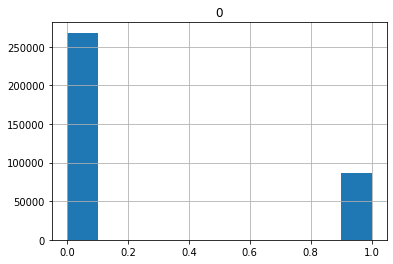

In [ ]:
s = tf.round(sd['loan_status'])
pd.DataFrame(s).hist()

**Scope of Improvement:**<br>
1: Running Model for more iteration<br>
2: By understandiing data deeply<br>
3: by using Model Hyperparametric Tuning <br>
4: By Incoporating other Model like SVM etc
